# Data structures accepted by seaborn
   
Seaborn에 데이터를 넣는 방법   
대부분의 함수가 list, dictionary 같은 파이썬 내장 형식뿐만 아니라 pandas나 numpy의 객체 데이터도 허용   
이러한 데이터 형태와 관련된 사용 패턴을 이해하여 시각화를 능숙하게 해내자!

>(v0.11.0) 현재 여기에서 다루는 전체 옵션은 seaborn 모듈의 하위 집합(즉, relational과 distribution 모듈)에서만 지원    
다른 모듈도 대부분 동일옵션을 제공하지만 몇 가지 예외가 있음(예: catplot() 및 lmplot()은 명명된 변수가 있는 Long-form 데이터만 사용가능)    
데이터 수집 코드는 차차 표준화될 예정이지만 그 전까진 데이터세트에서 생각처럼 작동하지 않는 경우, 각 기능별 문서를 참고할 것

## Long-form vs. wide-form data

seaborn의 대부분의 플로팅 기능은 데이터 벡터를 지향   
y에 대해 x를 플로팅할 때 각 변수는 벡터여야 함   
Seaborn은 일부 표 형식으로 구성된 둘 이상의 벡터가 있는 데이터 세트 허용   
"Long-form"과 "Wide-form" 데이터 테이블 사이에는 근본적인 차이가 있으며 seaborn은 각각을 다르게 취급

🤔~~벡터 데이터라는 말이 느낌적인 느낌으로만 알고 있어서 뜻이 명확하지 않다..!~~

### Long-form data

특징:   
- 각 변수(variable)는 열(column)
- 각 관찰(observation)은 행(row)

In [1]:
import seaborn as sns
sns.set_theme()

In [2]:
# "flights" 데이터 세트 : 1949년부터 1960년까지 매달 비행기를 탄 승객 수 기록
# 변수 : 연도, 월, 승객 수
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


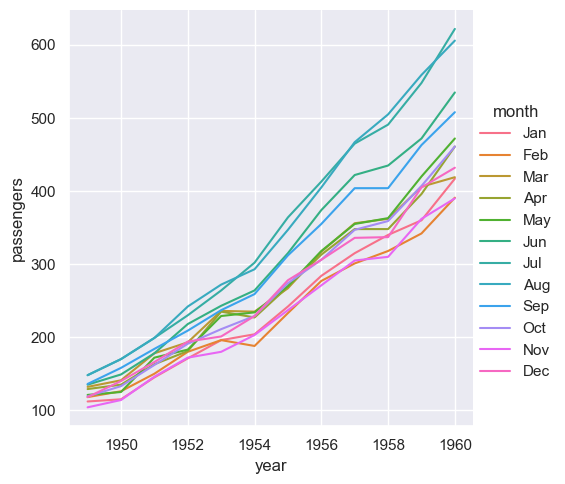

In [3]:
# 연간 승객 수의 월별 도표
# x에 년도, y에 승객수, hue(색상그룹)에 월 변수 할당
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

Long-form 데이터의 장점 : 열을 변수 중 하나에 명시적으로 할당 가능

변수와 관찰이 명확하게 정의될 수 있는 한 복잡한 데이터 세트 표현 가능   
그러나 이 형식은 형태가 직관적이진 않아 익숙해지는 데 시간이 필요함

### Wide-form data


간단한 데이터 세트의 경우 열과 행에 여러 변수가 포함된 스프레드시트에서 데이터를 보는 방식으로 데이터를 생각하는 것이 더 직관적인 경우가 많음   

In [4]:
# flights 데이터 세트를 "피벗"하여 Wide-form으로 변환해 각 열에 연도별·월별 시계열 표현
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


위의 표에는 세 가지 변수가 있지만 다른 형태로 구성되어 있으며, 이 데이터 세트의 변수는 명명된 필드가 아닌 테이블의 차원에 연결  
각 관찰은 테이블의 셀에 있는 값과 행 및 열 인덱스에 대한 해당 셀의 좌표로 정의   
   
LF 데이터를 사용하면 변수명으로 데이터 세트의 변수에 접근이 가능하지만,  WF 데이터는 불가능   
하지만 테이블의 차원과 데이터 세트의 변수 간에 명확한 연관성이 있기 때문에, 플롯에서 이러한 변수 역할 할당 가능

> Seaborn은 x와 y가 할당되지 않은 경우 데이터에 대한 인수를 WF으로 취급
   
~~🤔여기도 약간 말이 어렵네 어떻게 쉽게 풀 수 있을까~~

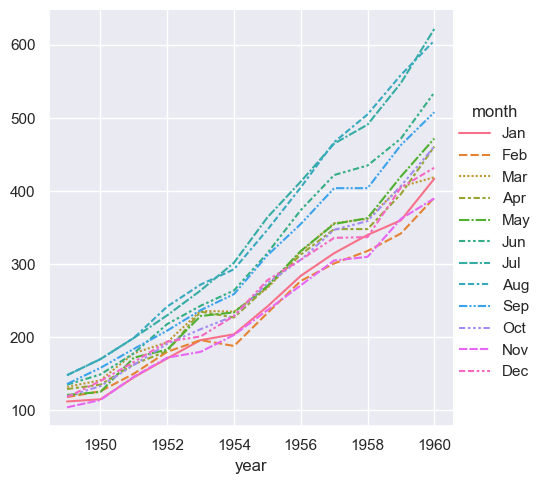

In [5]:
sns.relplot(data=flights_wide, kind="line")

이전 플롯과 유사한 형태 ( x = index, y = value(passengers), hue = month)

차이   
1. 피벗 작업으로 인해 passengers 이름 정보 손실 -> y축 레이블 없음
2. 색상, 스타일이 모두 다름 -> `replot()`이 플롯에 더 쉽게 접근할 수 있도록 열 변수를 색상 및 스타일에 전부 매핑   
    (LF의 경우, style="month" 옵션으로 설정 가능)
   
이 방법은 더 쉽게 느껴지지만, 올바른 형식으로 된 데이터일 경우 LF 데이터는 구조에 대해 고민할 필요가 없이 플롯에 포함된 변수만 생각하여 플롯 디자인을 할 수 있음   

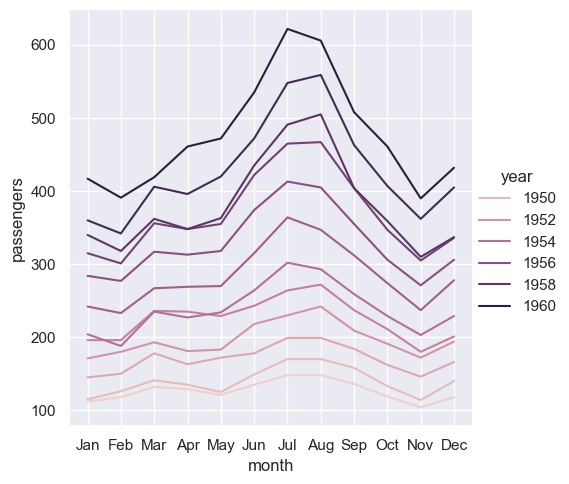

In [6]:
# LF - 간단히 변수만 할당하여 각 연도의 월별 시계열 선 출력
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

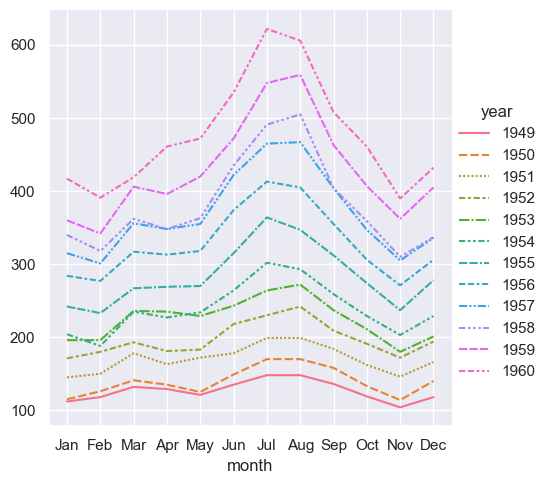

In [7]:
# WF - 테이블 형태 변경(T)하여 표현
sns.relplot(data=flights_wide.transpose(), kind="line")

- WF : 현재 데이터 유형에 관계없이 데이터세트의 열 변수를 범주형으로 간주
- LF : 변수의 유형(숫자)을 인식하여 자동으로 양적 색상 팔레트와 범례 할당

변수명이 없다면 각 플롯 유형별로 WF 데이터의 차원과 플롯의 역할 간에 고정 매핑을 정의해야 하는데,   
자연스러운 매핑은 플롯 유형에 따라 다를 수 있어 WF 데이터 사용 시 결과 예측이 어려움

-> 플롯에 정해진 형식에 WF 데이터 구조를 맞춰야 함

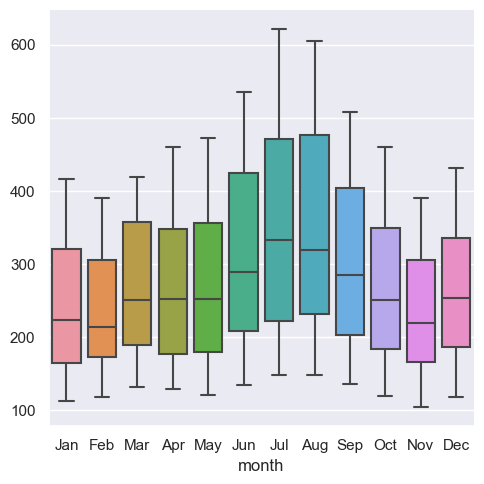

In [8]:
# categorical 플롯의 경우 테이블의 열 차원을 x에 할당한 다음 행 전체 집계(인덱스 무시)
sns.catplot(data=flights_wide, kind="box")

- pandas : 3개 이하의 변수 사용가능(pandas 멀티 인덱스 지원 X)    
- xarray : 레이블이 지정된 N차원 배열 개체 제공   

xarray 개체를 직접 지원하지 않지만 to_pandas 메서드를 사용하여 long-form 형태의 pandas.DataFrame으로 변환해 사용
   
LF, WF 데이터 세트 이미지화:

![nn](../img/LF-WF.png)

### Messy data

- 깔끔한 데이터세트: LF, WF   
- 지저분한 데이터세트: 위 규칙으로 명확히 정의하기 어려운 데이터 세트, 이 때의 변수는 키나 테이블 차원으로 고유하게 정의되지 않음   

반복 측정 데이터 수집시 수집 데이터 입력이 편하도록 구성된 테이블에서 자주 발생

In [9]:
# 피험자 20명의 주의를 분산시키거나 집중하는 동안 기억 훈련을 수행하는 심리학 실험데이터 세트
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


피험자 간 변수와 피험자 내 변수가 섞여있음   
- 애너그램에 대한 솔루션 수 : num1 ~ num3   
- 솔루션 수에 대한 종속 변수 : 기억 훈련 점수

이 두 변수(숫자 및 점수)는 여러 열에 공동으로 인코딩 > 결과적으로 전체 데이터 세트는 LF, WF이 섞여 있음

attnr과 솔루션 수로 평균점수를 표현하도록 만들기 위해서는 먼저 데이터를 두 구조 중 하나로 강제 변환해야 함   
-> 각 변수가 열이고 각 행이 관측값이 되도록 깔끔한 LF 테이블로 변환(`pandas.DataFrame.melt()` 메서드 사용)

In [10]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


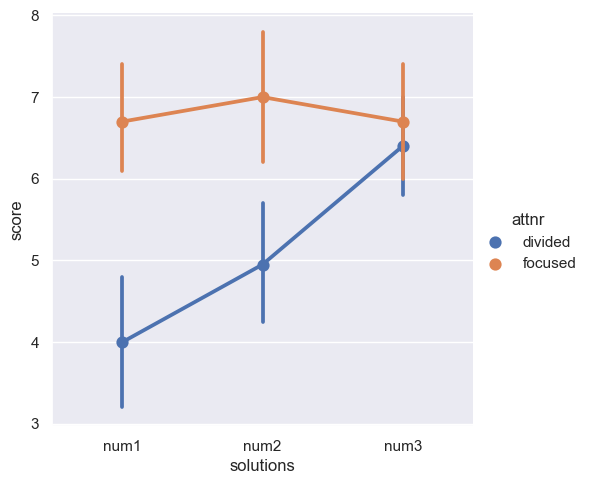

In [11]:
# 플롯 구현
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

### 추가자료 및 팁

- Hadley Wickham의 "Tidy Data" - 데이터 구조 관련 문서 (seaborn 백서와는 약간 다른 개념을 사용함. ex> tidy wide-form과 messy data의 구분)
- LF 데이터세트를 사용해야 세 개 이상의 변수를 활용해 명시적으로 역할을 할당한 플롯을 그릴 수 있음, 가능한한 LF 구조로 데이터 세트 구성할 것을 추천
- 간단한 데이터를 직관적으로 나타내기 편할 땐 WF 사용

## Options for visualizing long-form data

롱폼 데이터에는 정확한 정의가 있지만, seaborn은 실제 메모리의 데이터 구조 전반에 걸쳐 구성되는 방식 측면에서 상당히 유연합니다.🤔   
뒤에 나올 예제에서는 일반적으로 플롯의 변수에 해당 열의 이름을 할당하여 pandas.DataFrame 개체 및 참조 변수를 사용합니다.  
그러나 해당 인터페이스를 구현하는 Python 딕셔너리 또는 클래스에 벡터를 저장하는 것도 가능합니다.

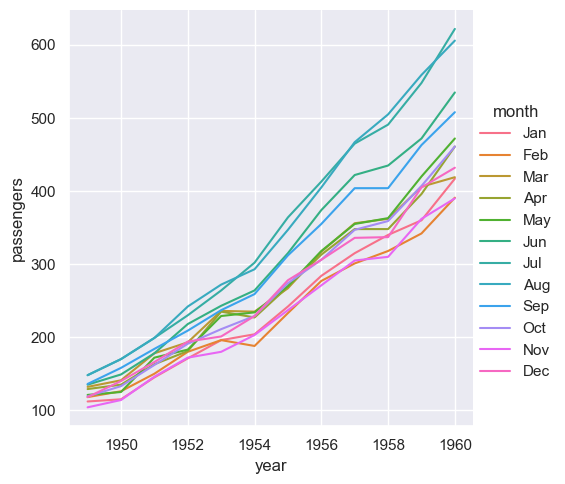

In [12]:
# 딕셔너리 형태 가져오기
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

In [18]:
flights_dict.keys()

dict_keys(['year', 'month', 'passengers'])

group-by의 split-apply-combine 작업과 같은 많은 pandas 작업은 정보가 입력 데이터 프레임의 열에서 출력 인덱스로 이동한 데이터 프레임을 생성합니다.   
<span style = 'color : #D60958'>**이름이 유지되는 한 여전히 정상적으로 데이터를 참조할 수 있습니다.**</span> 이 부분이 포인트👍!

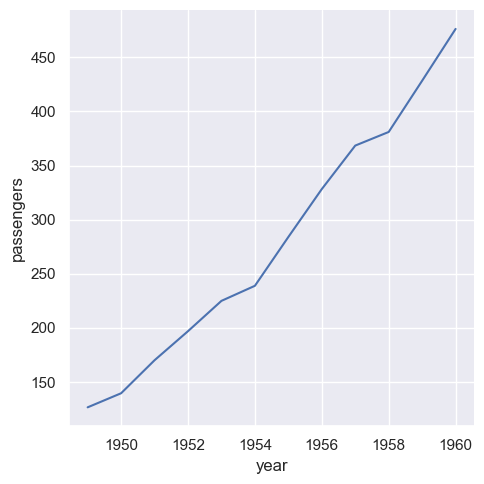

In [22]:
flights_avg = flights.groupby("year").mean()
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line")

- 데이터 벡터를 x, y 및 기타 플로팅 변수에 대한 인수로 직접 전달 가능   
- 벡터가 pandas 개체인 경우 이름 특성을 사용하여 플롯에 레이블 지정

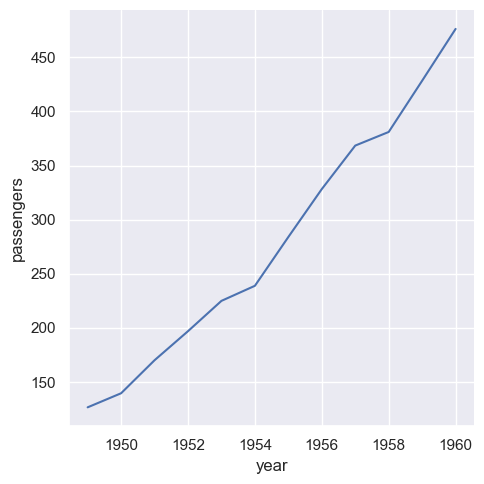

In [23]:
year = flights_avg.index
passengers = flights_avg["passengers"]
sns.relplot(x=year, y=passengers, kind="line")

In [32]:
flights_avg

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


- Python 시퀀스 인터페이스를 구현하는 Numpy 배열 및 기타 개체도 작동
- 그러나 이름이 없으면 플롯은 추가 조정 없이는 유익하지 않음

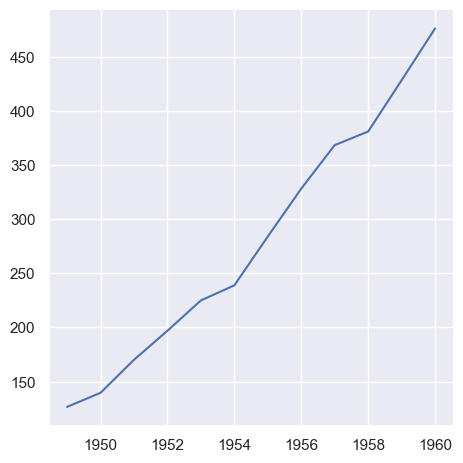

In [24]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line")

## Options for visualizing wide-form data

와이드폼 데이터를 전달하는 옵션은 훨씬 더 유연합니다.   
롱폼 데이터와 마찬가지로 이름(경우에 따라 인텍스) 정보를 사용할 수 있기 때문에 pandas 개체가 선호됩니다.    
그러나 본질적으로 단일 벡터 또는 벡터 모음으로 볼 수 있는 모든 형식을 데이터로 전달할 수 있으며 일반적으로 유효한 플롯을 구성할 수 있습니다.
   
위에서 본 예에서는 직사각형의 pandas.DataFrame을 사용했으며, 이는 해당 열의 모음으로 생각할 수 있습니다.   
Pandas 딕셔너리 또는 리스트도 작동하지만 축 레이블은 손실됩니다.

In [38]:
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


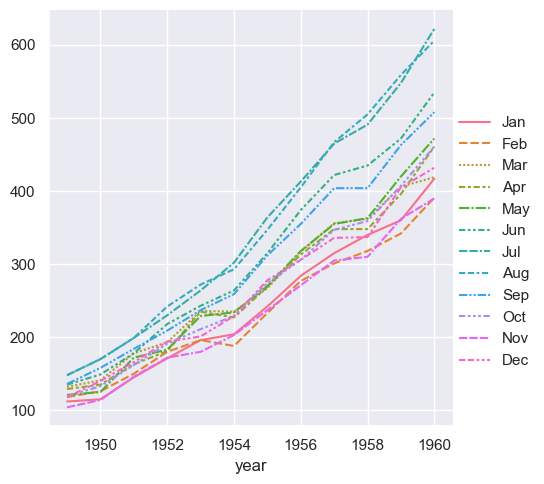

In [25]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind="line")

컬렉션의 벡터는 길이가 같을 필요가 없습니다. 인덱스가 있으면 정렬하는 데 사용됩니다.

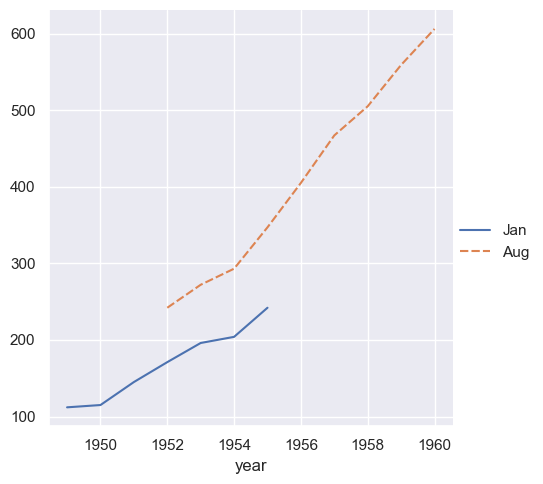

In [26]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line")

서수 인덱스(ordinal index)는 numpy 배열 또는 간단한 Python 시퀀스에 사용되는 반면:

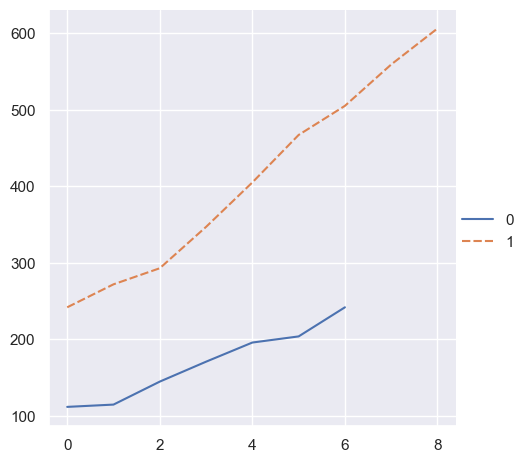

In [27]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line")

그러나 이러한 벡터의 딕셔너리는 최소한 키를 사용합니다.

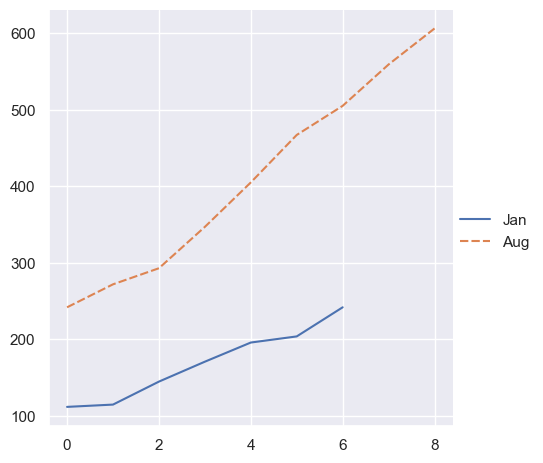

In [30]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

직사각형 numpy 배열은 **인덱스 정보가 없는 데이터 프레임처럼 취급**되므로 열 벡터의 모음으로 간주됩니다.    
이것은 단일 인덱서가 행에 액세스하는 numpy 인덱싱 작업의 작동 방식과 다릅니다.    
그러나 pandas가 배열을 데이터 프레임으로 변환하는 방법 또는 matplotlib가 배열을 그리는 방법과 일치합니다.

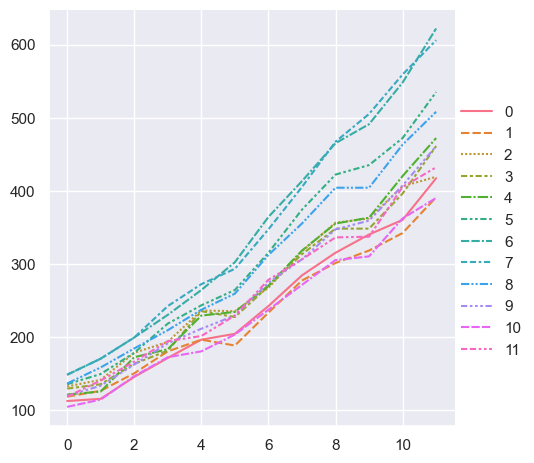

In [31]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line")